<a href="https://colab.research.google.com/github/GenAIUnplugged/tensorflow_series/blob/main/Tensorflow_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains 3,670 images of flowers categorized into five classes: daisy, dandelion, roses, sunflowers, and tulips.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the tf_flowers dataset
(ds_train, ds_test), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
})

In [ ]:
# Define image size and batch size
IMG_SIZE = 180
BATCH_SIZE = 32
NUM_CLASSES = ds_info.features['label'].num_classes

# Image Preprocessing

In [ ]:
# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, depth=NUM_CLASSES)
    return image, label

In [ ]:
# Apply preprocessing
ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
# Shuffle, batch, cache, and prefetch
ds_train = ds_train.shuffle(1000).batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

# Build CNN Model

In [ ]:
from tensorflow.keras.layers import Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),
    Dropout(0.25),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    Dropout(0.5),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.GlobalAveragePooling2D(),  # Replaces Flatten
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile and Train the Model

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=20
)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 152ms/step - accuracy: 0.2632 - loss: 1.5517 - val_accuracy: 0.4196 - val_loss: 1.2706
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4416 - loss: 1.2656 - val_accuracy: 0.4659 - val_loss: 1.1838
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4858 - loss: 1.1889 - val_accuracy: 0.5300 - val_loss: 1.1389
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5318 - loss: 1.1406 - val_accuracy: 0.5572 - val_loss: 1.0931
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5464 - loss: 1.0964 - val_accuracy: 0.5804 - val_loss: 1.0530
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5647 - loss: 1.0690 - val_accuracy: 0.6104 - val_loss: 1.0180
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6068 - loss: 1.0100 - val_accuracy: 0.6172 - val_loss: 0.9828
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6136 - loss: 0.9957 - val_accuracy: 0.6253 -

# Evaluate the Model

In [ ]:
loss,accuracy = model.evaluate(ds_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6592 - loss: 0.8125
Test Loss: 0.7813
Test Accuracy: 67.17%


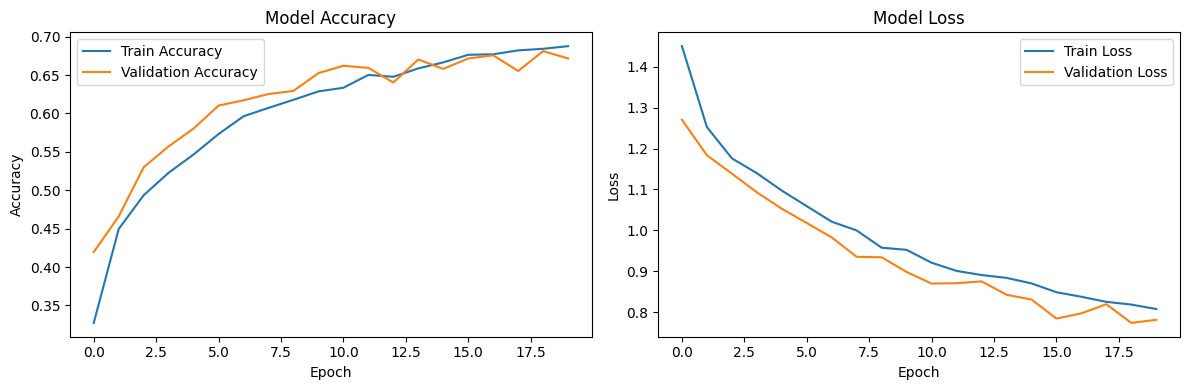

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


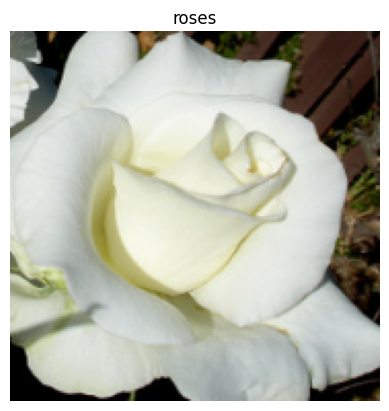

In [ ]:
# Get the label names
get_label_name = ds_info.features['label'].int2str

# Fetch one batch
for image_batch, label_batch in ds_train.take(1):
    # Select the first image and label from the batch
    image = image_batch[0].numpy()
    label = tf.argmax(label_batch[0]).numpy() # Use tf.argmax and convert to numpy for display
    plt.imshow(image)
    plt.axis('off')
    plt.title(get_label_name(label))
    plt.show()